Flight delay is inevitable and it plays an important role in both profits and loss 
of the airlines. An accurate estimation of flight delay is critical for airlines because 
the results can be applied  to increase customer satisfaction and incomes of 
airline agencies.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import plot_roc_curve



#Suppress warnings...
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('/Users/akhilmandula/Desktop/Data Science/Project/Airlines.csv')
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [2]:
'''The info() method prints information about the DataFrame. 
The information contains the number of columns, column labels, column data types, 
memory usage, range index, and the number of cells in each column (non-null values).
Note: the info() method actually prints the info.

'''
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [3]:
#Provides the frequency of patterns for the feature "Delay"
df['Delay'].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

#Since there are three columns with the non-numeric data, we have to convert it into numeric

In [4]:
df['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

In [6]:
pd.isnull(df["Time"])

0         False
1         False
2         False
3         False
4         False
          ...  
539378    False
539379    False
539380    False
539381    False
539382    False
Name: Time, Length: 539383, dtype: bool

In [5]:
df['AirportFrom'].value_counts()

ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64

In [6]:
df['AirportTo'].value_counts()

ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportTo, Length: 293, dtype: int64

In [7]:
#include all the columns with categorical data with type object 
#i.e non integer (columns: Airline, From , To)
df_with_no_numbers=df.select_dtypes(include='object')
df_with_no_numbers

,Airline,AirportFrom,AirportTo
0,CO,SFO,IAH
1,US,PHX,CLT
2,AA,LAX,DFW
3,AA,SFO,DFW
4,AS,ANC,SEA
...,...,...,...
539378,CO,OGG,SNA
539379,FL,SEA,ATL
539380,FL,SFO,MKE
539381,UA,HNL,SFO


In [8]:
#include all the columns with data that has numbers 

df_with_numbers=df.select_dtypes(exclude='object')
df_with_numbers

,id,Flight,DayOfWeek,Time,Length,Delay
0,1,269,3,15,205,1
1,2,1558,3,15,222,1
2,3,2400,3,20,165,1
3,4,2466,3,20,195,1
4,5,108,3,30,202,0
...,...,...,...,...,...,...
539378,539379,178,5,1439,326,0
539379,539380,398,5,1439,305,0
539380,539381,609,5,1439,255,0
539381,539382,78,5,1439,313,1


In [9]:
#get_dummies() is used for data manipulation. 
#It converts categorical data into dummy or indicator variables

df_dummies=pd.get_dummies(df_with_no_numbers,drop_first=True)

In [10]:
df_dummies

,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,Airline_HA,Airline_MQ,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539379,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
539381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Columns: 601 entries, Airline_AA to AirportTo_YUM
dtypes: uint8(601)
memory usage: 309.2 MB


In [12]:
final_df=pd.concat([df_with_numbers,df_dummies],axis=1)

In [13]:
final_df

,id,Flight,DayOfWeek,Time,Length,Delay,Airline_AA,Airline_AS,Airline_B6,Airline_CO,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,1,269,3,15,205,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1558,3,15,222,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2400,3,20,165,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2466,3,20,195,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,108,3,30,202,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,178,5,1439,326,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
539379,539380,398,5,1439,305,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,539381,609,5,1439,255,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539381,539382,78,5,1439,313,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
final_df['Time']

0           15
1           15
2           20
3           20
4           30
          ... 
539378    1439
539379    1439
539380    1439
539381    1439
539382    1439
Name: Time, Length: 539383, dtype: int64

<AxesSubplot:xlabel='Time', ylabel='count'>

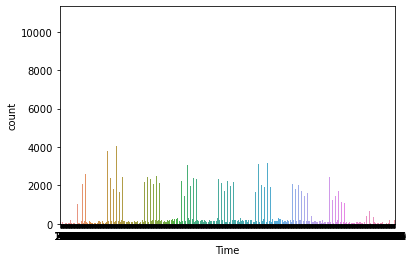

In [15]:
sns.countplot(x=final_df['Time'],data=final_df)

In [16]:
final_df['Time'].describe()

count    539383.000000
mean        802.728963
std         278.045911
min          10.000000
25%         565.000000
50%         795.000000
75%        1035.000000
max        1439.000000
Name: Time, dtype: float64

#There is no use in having the id column so lets drop it

In [17]:
final_df=final_df.drop('id',axis=1)

In [18]:
final_df

,Flight,DayOfWeek,Time,Length,Delay,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,269,3,15,205,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1558,3,15,222,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2400,3,20,165,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2466,3,20,195,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,108,3,30,202,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,178,5,1439,326,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
539379,398,5,1439,305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,609,5,1439,255,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539381,78,5,1439,313,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Columns: 606 entries, Flight to AirportTo_YUM
dtypes: int64(5), uint8(601)
memory usage: 329.7 MB


In [20]:
X=final_df.drop('Delay',axis=1)
X

,Flight,DayOfWeek,Time,Length,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,269,3,15,205,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1558,3,15,222,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2400,3,20,165,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2466,3,20,195,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,108,3,30,202,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,178,5,1439,326,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
539379,398,5,1439,305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,609,5,1439,255,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539381,78,5,1439,313,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y=final_df['Delay']
y

0         1
1         1
2         1
3         1
4         0
         ..
539378    0
539379    0
539380    0
539381    1
539382    1
Name: Delay, Length: 539383, dtype: int64

In [22]:
#SINCE IT IS THE CLASSIFICATION TASK WE WILL APPLY THE FOLLOWING CLASSIFICATION ALGORITHMS
#Logistic Regression
#Knn
#Decision Tree
#Random Forest Classifier
#Boosting

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Splitting the data with proporations ; test = 30, training =70
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_model=LogisticRegression()

In [27]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred1=log_model.predict(X_test)

In [29]:
print(f'Accuracy score:{accuracy_score(y_test,y_pred1)}')

Accuracy score:0.6369001637672651


In [30]:
confusion_matrix(y_test,y_pred1)

array([[69434, 20648],
       [38107, 33626]])

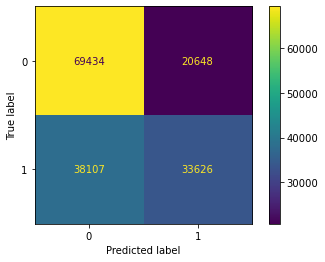

In [31]:
plot_confusion_matrix(log_model,X_test,y_test)

In [32]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.65      0.77      0.70     90082
           1       0.62      0.47      0.53     71733

    accuracy                           0.64    161815
   macro avg       0.63      0.62      0.62    161815
weighted avg       0.63      0.64      0.63    161815



In [33]:
print(precision_score(y_test,y_pred1))

0.619560010318016


In [34]:
print(recall_score(y_test,y_pred1))

0.4687661188016673


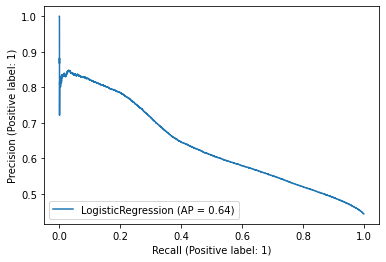

In [35]:
plot_precision_recall_curve(log_model,X_test,y_test)

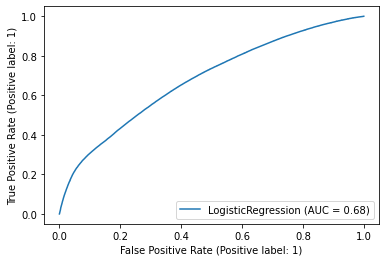

In [36]:
plot_roc_curve(log_model,X_test,y_test)

### K-NEAREST NEIGHBOUR 

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn_model=KNeighborsClassifier(n_neighbors=4)

In [85]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [86]:
y_pred2=knn_model.predict(X_test)

In [87]:
print(f'Accuracy score:{accuracy_score(y_test,y_pred2)}')


print(classification_report(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))



Accuracy score:0.6403979853536446
              precision    recall  f1-score   support

           0       0.67      0.71      0.69     90082
           1       0.60      0.56      0.58     71733

    accuracy                           0.64    161815
   macro avg       0.63      0.63      0.63    161815
weighted avg       0.64      0.64      0.64    161815

0.6022096112050229
0.5562293505081344


In [88]:
confusion_matrix(y_test,y_pred2)

array([[63726, 26356],
       [31833, 39900]])

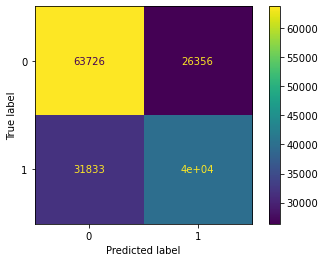

In [89]:
plot_confusion_matrix(knn_model,X_test,y_test)

In [ ]:
plot_precision_recall_curve(knn_model,X_test,y_test)

In [ ]:
plot_roc_curve(knn_model,X_test,y_test)

### Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
tree_model=DecisionTreeClassifier()

In [39]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred3=tree_model.predict(X_test)

In [41]:
print(f'Accuracy score:{accuracy_score(y_test,y_pred3)}')

print(classification_report(y_test,y_pred3))
print(f'Precision:{precision_score(y_test,y_pred3)}')
print(F'Recall:{recall_score(y_test,y_pred3)}')


Accuracy score:0.6099928931186849
              precision    recall  f1-score   support

           0       0.63      0.71      0.67     90082
           1       0.57      0.48      0.52     71733

    accuracy                           0.61    161815
   macro avg       0.60      0.60      0.60    161815
weighted avg       0.61      0.61      0.60    161815

Precision:0.5711222537441446
Recall:0.4827067040274351


In [42]:
confusion_matrix(y_test,y_pred3)


array([[64080, 26002],
       [37107, 34626]])

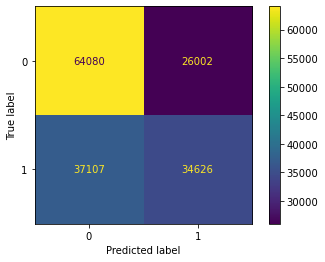

In [43]:
plot_confusion_matrix(tree_model,X_test,y_test)

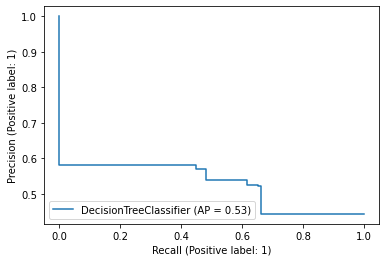

In [44]:
plot_precision_recall_curve(tree_model,X_test,y_test)


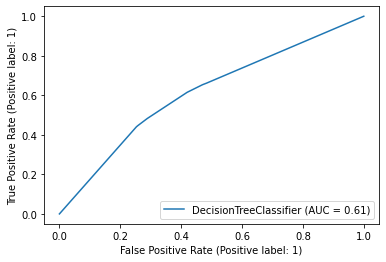

In [45]:
plot_roc_curve(tree_model,X_test,y_test)

### Random forest classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier


In [47]:
ran_model=RandomForestClassifier(n_estimators=15)

In [48]:
ran_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15)

In [49]:
y_pred4=ran_model.predict(X_test)

In [50]:
print(accuracy_score(y_test,y_pred4))



print(classification_report(y_test,y_pred4))
print(f'Precision:{precision_score(y_test,y_pred4)}')
print(F'Recall:{recall_score(y_test,y_pred4)}')


0.6149800698328338
              precision    recall  f1-score   support

           0       0.65      0.66      0.66     90082
           1       0.57      0.55      0.56     71733

    accuracy                           0.61    161815
   macro avg       0.61      0.61      0.61    161815
weighted avg       0.61      0.61      0.61    161815

Precision:0.5675060484159592
Recall:0.5526326795198863


In [51]:
confusion_matrix(y_test,y_pred4)


array([[59871, 30211],
       [32091, 39642]])

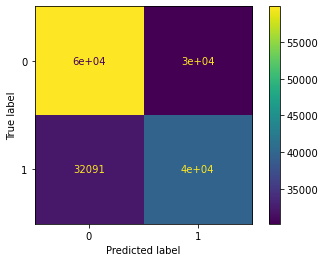

In [52]:
plot_confusion_matrix(ran_model,X_test,y_test)

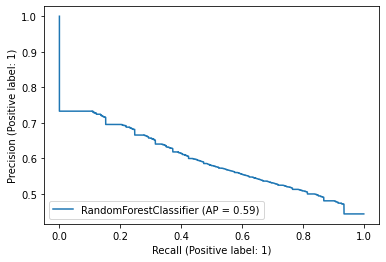

In [53]:
plot_precision_recall_curve(ran_model,X_test,y_test)


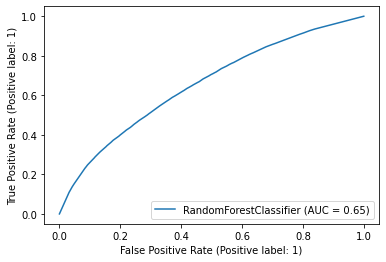

In [54]:
plot_roc_curve(ran_model,X_test,y_test)

In [55]:
#if we want to choose the best parametrs we can use this but in jupyter notebook it takes lot of time

### Boosting Models

In [56]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier



In [57]:
ada_model=AdaBoostClassifier()

In [58]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [59]:
y_pred5=ada_model.predict(X_test)

In [60]:
print(f'Accuracy score:{accuracy_score(y_test,y_pred5)}')

print(classification_report(y_test,y_pred5))
print(f'Precision:{precision_score(y_test,y_pred5)}')
print(F'Recall:{recall_score(y_test,y_pred5)}')


Accuracy score:0.6468003584340142
              precision    recall  f1-score   support

           0       0.65      0.79      0.71     90082
           1       0.64      0.47      0.54     71733

    accuracy                           0.65    161815
   macro avg       0.64      0.63      0.63    161815
weighted avg       0.65      0.65      0.64    161815

Precision:0.638719744253311
Recall:0.4679296836881212


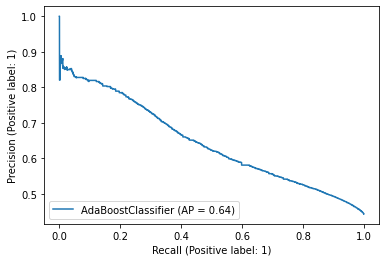

In [61]:
plot_precision_recall_curve(ada_model,X_test,y_test)


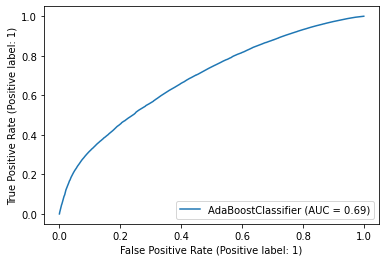

In [62]:
plot_roc_curve(ada_model,X_test,y_test)

In [63]:
confusion_matrix(y_test,y_pred5)



array([[71096, 18986],
       [38167, 33566]])

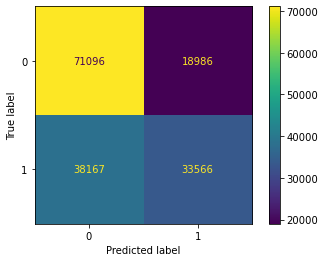

In [64]:
plot_confusion_matrix(ada_model,X_test,y_test)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier


In [66]:
gboost_model=GradientBoostingClassifier()

In [67]:
gboost_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [68]:
y_pred6=gboost_model.predict(X_test)

In [69]:
print(f'Accuracy score:{accuracy_score(y_test,y_pred6)}')

print(classification_report(y_test,y_pred6))
print(f'Precision:{precision_score(y_test,y_pred6)}')
print(F'Recall:{recall_score(y_test,y_pred6)}')


Accuracy score:0.6499088465222631
              precision    recall  f1-score   support

           0       0.64      0.86      0.73     90082
           1       0.68      0.39      0.50     71733

    accuracy                           0.65    161815
   macro avg       0.66      0.62      0.61    161815
weighted avg       0.66      0.65      0.63    161815

Precision:0.683451312364689
Recall:0.3916746825031715


In [70]:
confusion_matrix(y_test,y_pred6)


array([[77069, 13013],
       [43637, 28096]])

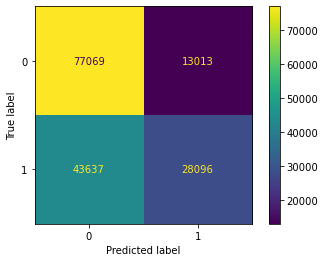

In [71]:
plot_confusion_matrix(gboost_model,X_test,y_test)

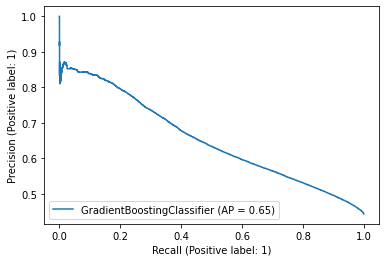

In [72]:
plot_precision_recall_curve(gboost_model,X_test,y_test)


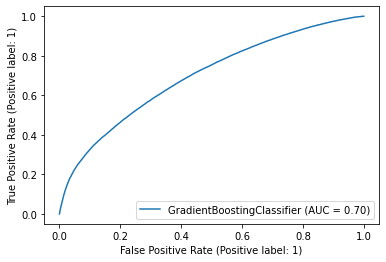

In [73]:
plot_roc_curve(gboost_model,X_test,y_test)

In [74]:
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier



In [75]:
xgbmodel=XGBClassifier()

In [76]:
xgbmodel.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [77]:
y_pred7=xgbmodel.predict(X_test)

In [78]:
print(f'Accuracy score:{accuracy_score(y_test,y_pred7)}')

print(classification_report(y_test,y_pred7))
print(f'Precision:{precision_score(y_test,y_pred7)}')
print(F'Recall:{recall_score(y_test,y_pred7)}')


Accuracy score:0.6655192658282607
              precision    recall  f1-score   support

           0       0.66      0.81      0.73     90082
           1       0.67      0.48      0.56     71733

    accuracy                           0.67    161815
   macro avg       0.67      0.65      0.65    161815
weighted avg       0.67      0.67      0.66    161815

Precision:0.6698366158060223
Recall:0.4840868219647861


In [79]:
confusion_matrix(y_test,y_pred7)


array([[72966, 17116],
       [37008, 34725]])

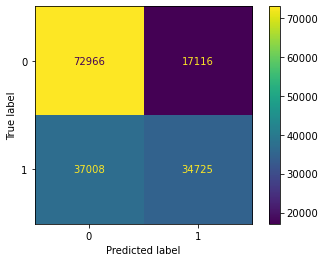

In [80]:
plot_confusion_matrix(xgbmodel,X_test,y_test)

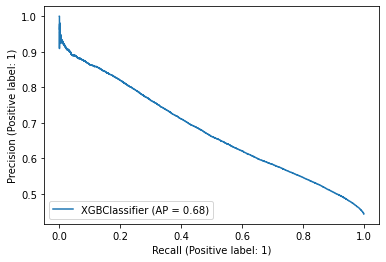

In [81]:
plot_precision_recall_curve(xgbmodel,X_test,y_test)


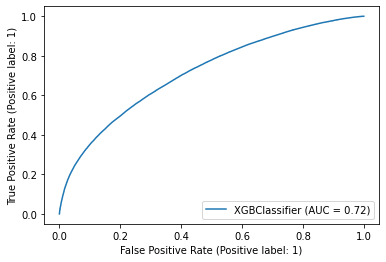

In [82]:
plot_roc_curve(xgbmodel,X_test,y_test)

Random Forest Calssifier is the best model with Precision of 0.57 and Recall of 0.55 with 61% of accuracy when compared to remaining models 